# Download Dataset

**You will likely not use this notebook if you are creating your research project with your own new data.**

This is for downloading a dataset from the internet, as for our example with the [MedMNIST](https://zenodo.org/records/10519652) dataset.
Your dataset will likely be uploaded from wherever you collected your data.

In [2]:
!pwd

/blue/prismap-ai-core/sasank.desaraju/projects/med-start/notebooks


Let's first set up where our data will be downloaded to.
We're going to use a clever package called `rootutils` to help us with this.
Let's (1) ensure that the empty file ".project-root" is in the root of our project, and (2) add our chosen data directory to a new ".env" file.
For this second part, copy the file ".env.example" to ".env" and add the path to your data directory.


In [10]:
import rootutils
import os
# print("current file is ", __file__)
print("current file is ", os.getcwd())
root = rootutils.find_root(search_from=os.getcwd(), indicator=".project-root")
print(root)
root = rootutils.setup_root(search_from=os.getcwd(), indicator=".project-root", dotenv=True, pythonpath=True, cwd=True)
# Print the environment variable DATA_DIR
print(os.environ["DATA_DIR"])

current file is  /blue/prismap-ai-core/sasank.desaraju/projects/med-start
/blue/prismap-ai-core/sasank.desaraju/projects/med-start
/blue/prismap-ai-core/sasank.desaraju/projects/med-start/data/


In [3]:
import monai
import os

# download the data if it's not already downloaded
resource = "https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar"
md5 = "410d4a301da4e5b2f6f86ec3ddba524e"
DATA_DIR = ''

compressed_file = os.path.join(self.root_dir, "Task09_Spleen.tar")
if not os.path.exists(self.data_dir):
    # print the directory it will be downloaded to
    print(f"Data will be downloaded to {self.data_dir}")
    monai.apps.download_and_extract(resource, compressed_file, self.root_dir, md5)

NameError: name 'os' is not defined

In [1]:
# Running this block will download the adrenalmnist3.npz to the data folder, assuming you are in the med-start directory (the "root" of the project)
# TODO: Choose a better dataset. This is 3D and we should just stick with 2D for this
!wget https://zenodo.org/records/10519652/files/chestmnist_64.npz -P ../data

--2024-07-09 21:03:35--  https://zenodo.org/records/10519652/files/chestmnist_64.npz
Resolving zenodo.org (zenodo.org)... 2001:1458:d00:9::100:195, 2001:1458:d00:3b::100:200, 2001:1458:d00:3a::100:33a, ...
Connecting to zenodo.org (zenodo.org)|2001:1458:d00:9::100:195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 401604127 (383M) [application/octet-stream]
Saving to: ‘../data/chestmnist_64.npz’

chestmnist_64.npz   100%[===================>] 383.00M  14.1MB/s    in 29s     

2024-07-09 21:04:05 (13.3 MB/s) - ‘../data/chestmnist_64.npz’ saved [401604127/401604127]



In [3]:
# Open the .npz file in the data folder
import numpy as np
data = np.load('../data/chestmnist_64.npz')

In [2]:
# Check the keys in the .npz file
print(data.files)

['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']


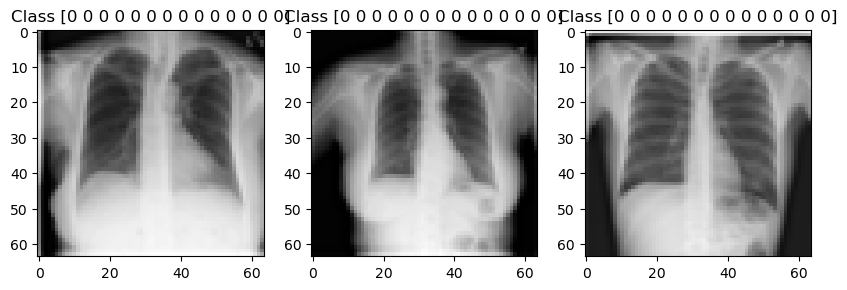

In [4]:
# Show some images from the dataset and their labels
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(3, 3, i + 1)
    plt.imshow(data['train_images'][i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(data['train_labels'][i]))
    
plt.show()

In [5]:
# Print the first few labels
for i in range(10):
    print(data['train_labels'][i])

# Are there keys about what the labels mean?
# Yes, there are keys for the class names
print(data['class_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 1 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 1 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


KeyError: 'class_names is not a file in the archive'

In [6]:
# Check the datatype of train_images
print(data['train_images'][0].dtype)

print(data['train_images'][0].shape)

print(data['train_labels'][0].dtype)

uint8
(64, 64)
uint8
